<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 12 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 20 November 2022</div>

# Final Project
Your final project will be to pick a corpus of text to analyse, model, and summarize. You need to use one or more of the ten methods exemplified in this notebook, and extend them as you see fit, possibly repeating methodologies you encounter in your research on the Web. You can use different methodologies and different libraries, but you may not pick a notebook you find on the Web and present that as yours. You may only pick the text you will work with. The techniques you employ in your final project need to begin from the ones in this notebook.

You will ***have to*** implement at least ***one*** computational model (a.k.a. Bayesian simulation), ***one*** network model (a.k.a. PageRank), and ***one*** semantic model (e.g. clustering or LDA). Note that all groups will start form the same base 3 methods, so for a good peer grade, you definitely need to do research and extend the methods or apply them creatively in order to extreact a maximum amount of information from your chosen corpus.

The main libraries in NLP are `nltk`, `spacy`, `gensim`, `sklearn`, and a few others.

```
pip install spacy==2.2.1
```

In [1]:
import spacy as sp

# 1. Pretrained sentiment analysis

In [2]:
sentence = "I am a fan of Max Verstappen and in love with Dua Lipa"

## NLTK/Vader
NLTK’s Vader sentiment analysis tool uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics (e.g. increasing the intensity of the sentiment if some words like “really”, “so” or “a bit” are present).

Sentences containing negated positive words (e.g. “not happy”, “not good”) will still receive a negative sentence sentiment. Simpler sentiment analysis tools will just take the average of the sentiments of the words and would miss subtle details like this.

The disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

In [3]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.7579}

In [4]:
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.7579}

## TextBlob
Textblob’s Sentiment Analysis works in a similar way to NLTK — using a bag of words classifier, but the advantage is that it includes Subjectivity Analysis too (how factual/opinionated a piece of text is)!

However, it doesn’t contain the heuristics that NLTK has, and so it won’t intensify or negate a sentence’s sentiment.

In [5]:
import textblob

In [6]:
from textblob import TextBlob
TextBlob(sentence).sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

## Sklearn

In [7]:
import re
def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

In [8]:
sentences = [
    "Shall I compare thee to a summer’s day?",
"Thou art more lovely and more temperate:",
"Rough winds do shake the darling buds of May,",
"And summer’s lease hath all too short a date:",
"Sometime too hot the eye of heaven shines,",
"And often is his gold complexion dimm’d;",
"And every fair from fair sometime declines,",
"By chance or nature’s changing course untrimm’d;",
"But thy eternal summer shall not fade",
"Nor lose possession of that fair thou owest;",
"Nor shall Death brag thou wander’st in his shade,",
"When in eternal lines to time thou growest:",
"So long as men can breathe or eyes can see,",
"So long lives this and this gives life to thee."
]

In [9]:
labels = [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]

In [10]:
processed_sentences = eda(sentences)

In [11]:
processed_sentences

['shall compare thee to summer day ',
 'thou art more lovely and more temperate ',
 'rough winds do shake the darling buds of may ',
 'and summer lease hath all too short date ',
 'sometime too hot the eye of heaven shines ',
 'and often is his gold complexion dimm ',
 'and every fair from fair sometime declines ',
 'by chance or nature changing course untrimm ',
 'but thy eternal summer shall not fade',
 'nor lose possession of that fair thou owest ',
 'nor shall death brag thou wander st in his shade ',
 'when in eternal lines to time thou growest ',
 'so long as men can breathe or eyes can see ',
 'so long lives this and this gives life to thee ']

Scikit-Learn library contains the TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors. The following script performs this.

`max_df` specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, `min-df`, when set to `p`, includes words that occur in at least `p` documents.

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
processed_sentences_vectors = vectorizer.fit_transform(processed_sentences).toarray()

In [13]:
processed_sentences_vectors

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.50409992, 0.        , 0.        , 0.        ,
        0.        , 0.50409992, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38820384,
        0.        , 0.        , 0.        , 0.        , 0.38820384,
        0.        , 0.43630506, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.53570796, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

In [14]:
processed_sentences_vectors.shape

(14, 58)

We converted the data into the numeric form. As the last step before we train our algorithms, we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

We now use the train_test_split class from the sklearn.model_selection module to divide our data into training and testing set. The method takes the feature set as the first parameter, the label set as the second parameter, and a value for the test_size parameter. We specified a value of 0.2 for test_size which means that our data set will be split into two sets of 80% and 20% data. We will use the 80% dataset for training and 20% dataset for testing.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences_vectors, labels, test_size=0.2, random_state=0)

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. You can use any machine learning algorithm. However, we will use the Random Forest algorithm, owing to its ability to act upon non-normalized data.

The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do so, we need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters. Look at the following script:

In [16]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [17]:
sonnet33 = [
"Full many a glorious morning have I seen",
"Flatter the mountain tops with sovereign eye,",
"Kissing with golden face the meadows green,",
"Gilding pale streams with heavenly alchemy;",
"Anon permit the basest clouds to ride",
"With ugly rack on his celestial face,",
"And from the forlorn world his visage hide,",
"Stealing unseen to west with this disgrace:",
"Even so my sun one early morn did shine,",
"With all triumphant splendour on my brow;",
"But out, alack, he was but one hour mine,",
"The region cloud hath mask’d him from me now.",
"Yet him for this my love no whit disdaineth;",
"Suns of the world may stain when heaven’s sun staineth."
]

In [18]:
processed_sonnet33 = eda(sentences)

In [19]:
processed_sonnet33_vectors = vectorizer.fit_transform(processed_sonnet33).toarray()

In [20]:
processed_sonnet33_vectors

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.50409992, 0.        , 0.        , 0.        ,
        0.        , 0.50409992, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38820384,
        0.        , 0.        , 0.        , 0.        , 0.38820384,
        0.        , 0.43630506, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.53570796, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

In [21]:
processed_sonnet33_vectors.shape

(14, 58)

In [22]:
predictions = text_classifier.predict(processed_sonnet33_vectors[:,:58])
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [23]:
y_labels = [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]

Finally, to evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

To find the values for these metrics, we can use classification_report, confusion_matrix, and accuracy_score utilities from the sklearn.metrics library.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_labels, predictions))
print(classification_report(y_labels, predictions))
print(accuracy_score(y_labels, predictions))

[[1 2]
 [5 6]]
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.75      0.55      0.63        11

    accuracy                           0.50        14
   macro avg       0.46      0.44      0.43        14
weighted avg       0.62      0.50      0.54        14

0.5


92% accuracy.

## Text2Emotion
```
pip install text2emotion
```

Positive/negative is not the only possible sentiment classification!

- [text2emotion](https://pypi.org/project/text2emotion/)
- [github](https://shivamsharma26.github.io/text2emotion/)

In [25]:
import text2emotion as te

text = """I was asked to sign a third party contract a week out from stay. 
If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. 
Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom 
to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. 
Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. 
Perhaps some people like this but It negatively affected our enjoyment of the accommodation. 
Stairs - lots of them - some had slightly bending wood which caused a minor injury."""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
te.get_emotion()

TypeError: get_emotion() missing 1 required positional argument: 'input'

In [ ]:
te.get_emotion(text)

In [ ]:
te.get_emotion(sentence)

In [ ]:
te.get_emotion('.'.join(sonnet33))

## Spacy


In [28]:
import spacy

In [29]:
nlp = spacy.load('en_core_web_sm')

```
pip install --user spacytextblob==0.1.3
```

In [30]:
# spacytextblob insists to install spacy==3.4.3, which causes me problems!
from spacytextblob.spacytextblob import SpacyTextBlob

In [31]:
import textblob

In [32]:
#nlp.add_pipe("spacytextblob")
nlp.add_pipe(SpacyTextBlob)

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <class 'spacytextblob.spacytextblob.SpacyTextBlob'> (name: 'None').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

In [33]:
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(text)
doc._.blob.polarity                            # Polarity: -0.125
doc._.blob.subjectivity                        # Subjectivity: 0.9
doc._.blob.sentiment_assessments.assessments   # Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]
doc._.blob.ngrams()
#doc.sentiment

AttributeError: [E046] Can't retrieve unregistered extension attribute 'blob'. Did you forget to call the `set_extension` method?

In [34]:
doc._.blob.polarity                            # Polarity: -0.125
doc._.blob.subjectivity                        # Subjectivity: 0.9
doc._.blob.sentiment_assessments.assessments   # Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]
doc._.blob.ngrams()
#doc.sentiment

AttributeError: [E046] Can't retrieve unregistered extension attribute 'blob'. Did you forget to call the `set_extension` method?

# 2. Computational statistics with the Negative binomial
The [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) distribution is the distribution of a random variable that is defined as the number of independent Bernoulli trials until the k-th “success”. In short, we repeat a Bernoulli experiment until we observe k successes and record the number of trials it required.
 
$$ Y = \text{NB}(k, p)$$
 
where $0<=p<=1$ is the probability of success in each Bernoulli trial, , $k > 0$ usually integer, and $y \in \{k, k+1, \cdot \}$

Let’s understand the concept with the example of tossing a coin. Let’s say we want to continue flipping the coin until 3 heads come. This experiment of flipping a coin until 3 heads (r=3) come can be called as negative binomial experiment. And, the number of times the coin need to be flipped in each experiment represent the value of negative binomial random variable, X.

The probability mass function (pmf) is

$$p(y \;|\;k,p) = \binom{y-1}{y-k}(1-p)^{y-k}p^k$$

Recall we aim to have $k$ successes. And success is one of the two possible outcomes of a trial, so the number of trials can never be smaller than the number of successes. Thus, we can be confident to say that $y >=k$.

But this is not the only way of defining the negative binomial distribution, there are plenty of options! One of the most interesting, and the one you see in PyMC3, is as a **continuous mixture**. The negative binomial distribution describes a Poisson random variable whose rate is also a random variable (not a fixed constant!) following a gamma distribution. Or in other words, conditional on a gamma-distributed variable $\mu$, the variable $$Y has a Poisson distribution with mean $\mu$.

Under this alternative definition, the pmf is

$$p(y \;|\;k,p)=\binom{y+\alpha -1}{y} \left(\frac{\alpha}{\mu +\alpha}\right)^\alpha \left(\frac{\mu}{\mu +\alpha}\right)^y$$

where $\mu$ is the parameter of the Poisson distribution (the mean, and variance too!) and $\alpha$ is the rate parameter of the gamma.

In SciPy, the definition of the negative binomial distribution differs a little from the one in the introduction. They define $Y$ = Number of failures until $k$ sucesses and then $y$ starts at 0.

In [35]:
import numpy as np

In [36]:
from scipy.stats import nbinom

y = np.arange(0, 30)
k = 3
p1 = 0.5
p2 = 0.3

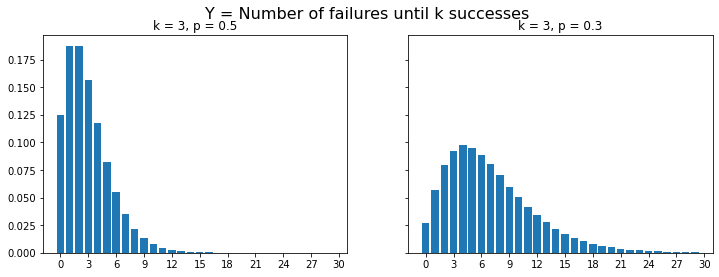

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].bar(y, nbinom.pmf(y, k, p1))
ax[0].set_xticks(np.linspace(0, 30, num=11))
ax[0].set_title(f"k = {k}, p = {p1}")

ax[1].bar(y, nbinom.pmf(y, k, p2))
ax[1].set_xticks(np.linspace(0, 30, num=11))
ax[1].set_title(f"k = {k}, p = {p2}")

fig.suptitle("Y = Number of failures until k successes", fontsize=16);

For example, when $p=0.5$, the probability of seeing $y=0$ failures before 3 successes (or in other words, the probability of having 3 successes out of 3 trials) is 0.125, and the probability of seeing $y=3$ failures before 3 successes is 0.156.

In [38]:
print(nbinom.pmf(y, k, p1)[0])
print(nbinom.pmf(y, k, p1)[3])

0.12499999999999997
0.15624999999999992


if one wants to show this probability mass function as if we are following the first definition of negative binomial distribution we introduced, we just need to shift the whole thing to the right by adding $k$ to the $y$ values.

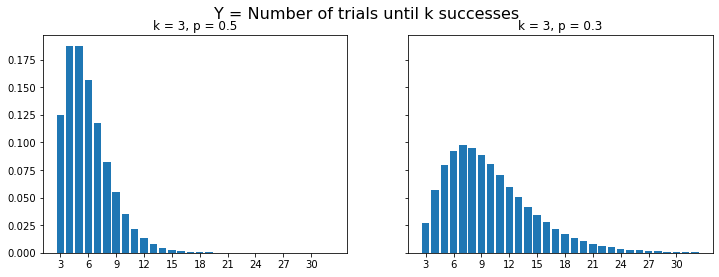

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].bar(y + k, nbinom.pmf(y, k, p1))
ax[0].set_xticks(np.linspace(3, 30, num=10))
ax[0].set_title(f"k = {k}, p = {p1}")

ax[1].bar(y + k, nbinom.pmf(y, k, p2))
ax[1].set_xticks(np.linspace(3, 30, num=10))
ax[1].set_title(f"k = {k}, p = {p2}")

fig.suptitle("Y = Number of trials until k successes", fontsize=16);

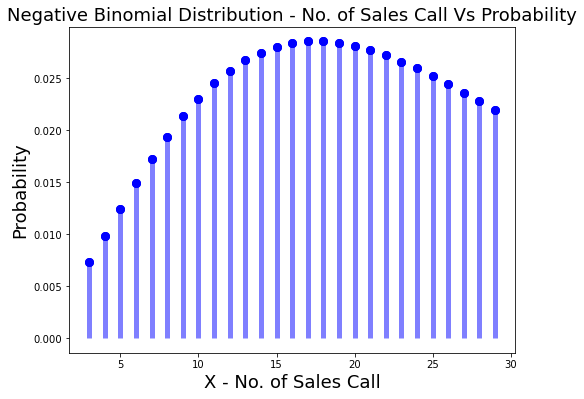

In [40]:
import numpy as np 
from scipy.stats import nbinom 
import matplotlib.pyplot as plt 

# 
# X = Discrete negative binomial random variable representing number of sales call required to get r=3 leads 
# P = Probability of successful sales call 
# 

X = np.arange(3, 30) 
r = 3 
P = 0.1 

# 
# Calculate geometric probability distribution 
# 
nbinom_pd = nbinom.pmf(X, r, P) 

# 
# Plot the probability distribution 
# 
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.plot(X, nbinom_pd, 'bo', ms=8, label='nbinom pmf') 
ax.plot(X, nbinom_pd, 'bo', ms=8, label='nbinom pmf') 
plt.ylabel("Probability", fontsize="18") 
plt.xlabel("X - No. of Sales Call", fontsize="18") 
plt.title("Negative Binomial Distribution - No. of Sales Call Vs Probability", fontsize="18") 
ax.vlines(X, 0, nbinom_pd, colors='b', lw=5, alpha=0.5)

## Utility routines

In [41]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, varnames=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,varnames=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

# Bayesian modeling of Sneezing with Negative Binomial distribution
We model sneezing while drinking alcohol and taking antihistamines.

In [42]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ImportError: DLL load failed while importing _netCDF4: The specified procedure could not be found.

Assume that sneezing occurs at some baseline rate, and that consuming alcohol, not taking antihistamines, or doing both, increase its frequency

In [ ]:
# Mean Poisson values
theta_noalcohol_meds = 1    # no alcohol, took an antihist
theta_alcohol_meds = 3      # alcohol, took an antihist
theta_noalcohol_nomeds = 6  # no alcohol, no antihist
theta_alcohol_nomeds = 36   # alcohol, no antihist

# Create samples
q = 1000
df_pois = pd.DataFrame({
        'nsneeze': np.concatenate((np.random.poisson(theta_noalcohol_meds, q),
                                   np.random.poisson(theta_alcohol_meds, q),
                                   np.random.poisson(theta_noalcohol_nomeds, q),
                                   np.random.poisson(theta_alcohol_nomeds, q))),
        'alcohol': np.concatenate((np.repeat(False, q),
                                   np.repeat(True, q),
                                   np.repeat(False, q),
                                   np.repeat(True, q))),
        'nomeds': np.concatenate((np.repeat(False, q),
                                      np.repeat(False, q),
                                      np.repeat(True, q),
                                      np.repeat(True, q)))})

In [ ]:
df_pois

In [ ]:
df_pois.groupby(['nomeds', 'alcohol'])['nsneeze'].agg(['mean', 'var'])

Since the mean and variance of a Poisson distributed random variable are equal, the sample means and variances are very close.

### Negative Binomial Data
Now, suppose every subject in the dataset had the flu, increasing the variance of their sneezing (and causing an unfortunate few to sneeze over 70 times a day). If the mean number of sneezes stays the same but variance increases, the data might follow a negative binomial distribution

In [ ]:
# Gamma shape parameter
alpha = 10

def get_nb_vals(mu, alpha, size):
    """Generate negative binomially distributed samples by
    drawing a sample from a gamma distribution with mean `mu` and
    shape parameter `alpha', then drawing from a Poisson
    distribution whose rate parameter is given by the sampled
    gamma variable.

    """

    g = stats.gamma.rvs(alpha, scale=mu / alpha, size=size)
    return stats.poisson.rvs(g)

# Create samples
n = 1000
df = pd.DataFrame({
        'nsneeze': np.concatenate((get_nb_vals(theta_noalcohol_meds, alpha, n),
                                   get_nb_vals(theta_alcohol_meds, alpha, n),
                                   get_nb_vals(theta_noalcohol_nomeds, alpha, n),
                                   get_nb_vals(theta_alcohol_nomeds, alpha, n))),
        'alcohol': np.concatenate((np.repeat(False, n),
                                   np.repeat(True, n),
                                   np.repeat(False, n),
                                   np.repeat(True, n))),
        'nomeds': np.concatenate((np.repeat(False, n),
                                      np.repeat(False, n),
                                      np.repeat(True, n),
                                      np.repeat(True, n)))})

In [ ]:
df.groupby(['nomeds', 'alcohol'])['nsneeze'].agg(['mean', 'var'])

As in the Poisson regression example, we see that drinking alcohol and/or not taking antihistamines increase the sneezing rate to varying degrees. Unlike in that example, for each combination of `alcohol` and `nomeds`, the variance of `nsneeze` is higher than the mean. This suggests that a Poisson distrubution would be a poor fit for the data since the mean and variance of a Poisson distribution are equal.

In [ ]:
g = sns.factorplot(x='nsneeze', row='nomeds', col='alcohol', data=df, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

## Negative Binomial Regression
### Create GLM Model
Generalised Linear models are an advanced methodology forBayesian simulation

In [ ]:
fml = 'nsneeze ~ alcohol + nomeds + alcohol:nomeds'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df, family=pm.glm.families.NegativeBinomial())

    # Old initialization
    # start = pm.find_MAP(fmin=optimize.fmin_powell)
    # C = pm.approx_hessian(start)
    # trace = pm.sample(4000, step=pm.NUTS(scaling=C))

    trace = pm.sample(2000, cores=2)

In [ ]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, varnames=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,varnames=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]

In [ ]:
rvs

In [ ]:
plot_traces(trace[1000:], varnames=rvs);

In [ ]:
# Transform coefficients to recover parameter values
np.exp(pm.summary(trace[1000:], varnames=rvs))

In [ ]:
np.exp(pm.summary(trace[1000:], varnames=rvs)[['mean','hdi_3%','hdi_97%']])

The mean values are close to the values we specified when generating the data: - The base rate is a constant 1. - Drinking alcohol triples the base rate. - Not taking antihistamines increases the base rate by 6 times. - Drinking alcohol and not taking antihistamines doubles the rate that would be expected if their rates were independent. If they were independent, then doing both would increase the base rate by 3 * 6 = 18 times, but instead the base rate is increased by 2.

Finally, even though the sample for mu is highly skewed, its median value is close to the sample mean, and the mean of alpha is also quite close to its actual value of 10.

In [ ]:
np.percentile(trace[1000:]['mu'], [25,50,75])

In [ ]:
df.nsneeze.mean()

In [ ]:
trace[1000:]['alpha'].mean()

# 3. Mao corpus
Harvested from [here](https://www.marxists.org/reference/archive/mao/selected-works/date-index.htm).

In [ ]:
import os
for root, dirs, files in os.walk("C:/Users/HP/Data science INFO6150/W12L1/mao-texts"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

In [ ]:
import os
mao_paragraphs = []
for root, dirs, files in os.walk("C:/Users/HP/Data science INFO6150/W12L1/mao-texts"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            mao_paragraphs.extend(paragraphs)
            
print(len(mao_paragraphs))
print(mao_paragraphs[0])

In [ ]:
import os
mao_sentences = []
for root, dirs, files in os.walk("C:/Users/HP/Data science INFO6150/W12L1/mao-texts"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            mao_sentences.extend(sentences)
            
print(len(mao_sentences))
print(mao_sentences[0])

In [ ]:
import pandas as pd
mao_df = pd.DataFrame(mao_sentences, columns = ['Sentence'])
mao_df.head()

In [ ]:
import matplotlib as plt
%matplotlib inline

In [ ]:
plt.

In [ ]:
mao_df['NumWords'] = mao_df['Sentence'].apply(lambda x: len(x.split()))
mao_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [ ]:
all_words = ''.join([word for word in mao_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
str = 'how many $ amount spend for Car??'
pattern = re.compile(r'[^a-z0-1\s]')
x = re.sub(pattern, ' ', str)
print(x)

In [ ]:
mao_df['Sentence2'][0]

In [ ]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
mao_df['Sentence2'] = mao_df['Sentence'].apply(normalize_texts)
mao_df.head()
mao_df['Sentence2'] = mao_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
mao_df['Sentence2'][0]

In [ ]:
NON_ALPHANUM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(mao_df['Sentence2'], 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Mao's top 40 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# 4. Main characters
Let's extract all characters, visualize their occurences relative to their position in the corpus, find out what adjectives they are associated with, etc.

In [ ]:
import spacy

nlp = spacy.load('en')

# Process `text` with Spacy NLP Parser
text = '. '.join(mao_sentences)
processed_text = nlp(text)

In [ ]:
# How many sentences are in the book (Pride & Prejudice)?
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:15])

In [ ]:
# Extract all the personal names and count their occurrences. 
# Expected output is a list in the following form: [('xxx', 622), ('yyy', 312), ('zzz', 286), ...].

from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

## Plot characters personal names as a time series 

In [ ]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

character_occurences = get_character_offsets(processed_text)

In [ ]:
print(list(character_occurences.keys()))

In [ ]:
[x for x in list(character_occurences.keys()) if any([x.startswith(y) for y in ['Sun Yat', 'Chiang Kai']])]

In [ ]:
# Extract Keywords using noun chunks from the news article (file 'article.txt').
# Spacy will pick some noun chunks that are not informative at all (e.g. we, what, who).
# Try to find a way to remove non informative keywords.

#article = read_file('data/article.txt')
#doc = nlp(article)
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(character_occurences, ['Mao Tse - tung', 'Chiang Kai - shek'])

# 5. Important words

In [ ]:
def get_words_paragraphs(paragraphs, words):
    
    word_para = defaultdict(list)
    for p in mao_paragraphs:
        for w in words:
            word_para[w].append(p.count(w))
            
    return dict(word_para)

peasant_gentry_occurences = get_words_paragraphs(mao_paragraphs, ['peasant', 'gentry'])
peasant_occurences = [v for k,v in peasant_gentry_occurences.items() if k == 'peasant'][0]
gentry_occurences = [v for k,v in peasant_gentry_occurences.items() if k == 'gentry'][0]
plt.plot(peasant_occurences)
plt.plot(gentry_occurences)

Moral words count in paragraphs that contain both `peasant` and `gentry`:

In [ ]:
moral_words = []
with open('D:/user/docs/NU/_Info6105/fp/fa.22/mfd.txt', "r") as input:
    pair_lines = input.read().split("\n")
for p in pair_lines:
    moral_words.append(p.split('\t')[0])
print(moral_words[0:10])

In [ ]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

moral_occurences = get_any_words_paragraphs(mao_paragraphs, moral_words)
plt.plot(moral_occurences)

In [ ]:
plt.plot(peasant_occurences)
plt.plot(gentry_occurences)
plt.plot([m / 4 for m in  moral_occurences])

In [ ]:
bool_peasant_occurences = [bool(v) for v in peasant_occurences]
bool_gentry_occurences = [bool(v) for v in gentry_occurences]

In [ ]:
df_moral = pd.DataFrame(list(zip(moral_occurences, gentry_occurences, peasant_occurences)), 
                        columns =['morals', 'gentry', 'peasants'])
df_moral

# 6. Negative binomial model

In [ ]:
fml = 'morals ~ gentry + peasants + gentry:peasants'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=2)

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

In [ ]:
plot_traces(trace[1000:], varnames=rvs);

In [ ]:
# Transform coefficients to recover parameter values
np.exp(pm.summary(trace[1000:], varnames=rvs))

In [ ]:
df_moral2 = pd.DataFrame(list(zip(moral_occurences, bool_gentry_occurences, bool_peasant_occurences)), 
                        columns =['morals', 'gentry_p', 'peasants_p'])
df_moral2

In [ ]:
g = sns.factorplot(x='morals', row='gentry_p', col='peasants_p', data=df_moral2, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [ ]:
df_moral2.groupby(['gentry_p', 'peasants_p'])['morals'].agg(['mean', 'var'])

We see that mentioning `peasants` and/or `gentry` increases the presence of moral words to varying degrees. For each combination of `peasants` and `gentry`, the variance of moral words is higher than the mean. This suggests that a Poisson distrubution would be a poor fit for the data since the mean and variance of a Poisson distribution are equal.

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

fml = 'morals ~ gentry_p + peasants_p + gentry_p:peasants_p'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral2, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(2000, cores=2)

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
print(rvs)
plot_traces(trace[1000:], varnames=rvs);

In [ ]:
np.exp(pm.summary(trace[500:], varnames=rvs)[['mean','hdi_3%','hdi_97%']])

In [ ]:
trace[1000:]['Intercept'].mean()

In [ ]:
trace[1000:]['peasants_p[T.True]'].mean()

Let's tally up more keywords:

In [ ]:
enemy_words = ['tyrants', 'evil', 'landlords', 'landlord', 'gentry', 'enemy']
friend_words = ['peasants', 'peasant', 'red', 'army', 'party', 'people', 'association', 'associations', 'masses', 'comrades']

In [ ]:
friend_occurences = get_any_words_paragraphs(mao_paragraphs, friend_words)
enemy_occurences = get_any_words_paragraphs(mao_paragraphs, enemy_words)

In [ ]:
plt.plot(friend_occurences)
plt.plot(enemy_occurences)
plt.plot(moral_occurences)

In [ ]:
bool_friend_occurences = [bool(v) for v in friend_occurences]
bool_enemy_occurences = [bool(v) for v in enemy_occurences]

In [ ]:
df_moral3 = pd.DataFrame(list(zip(moral_occurences, bool_friend_occurences, bool_enemy_occurences)), 
                        columns =['morals', 'friend_p', 'enemy_p'])
df_moral3

In [ ]:
g = sns.factorplot(x='morals', row='friend_p', col='enemy_p', data=df_moral3, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [ ]:
df_moral3.groupby(['friend_p', 'enemy_p'])['morals'].agg(['mean', 'var'])

In [ ]:
fml = 'morals ~ friend_p + enemy_p + enemy_p:friend_p'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral3, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(10000, cores=2)

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
print(rvs)
plot_traces(trace[1000:], varnames=rvs);

In [ ]:
np.exp(pm.summary(trace[1000:], varnames=rvs)[['mean','hdi_3%','hdi_97%']])

Does not make sense! The baseline is 3, that agrees with the statistics of oour dataset, but friend_p[T.True] should be times 6, enemy_p[T.True] should be times 8, and enemy_p[T.True]:friend_p[T.True] should be times 24!

In [ ]:
with model_interaction:
    az.plot_forest(
        trace,
        model_names=["Mao"],
        var_names=['Intercept', 'friend_p[T.True]', 'enemy_p[T.True]', 'enemy_p[T.True]:friend_p[T.True]'],
        combined=True,
        figsize=(8, 4)
    );

Try with sentences:

In [ ]:
moral_occurences = get_any_words_paragraphs(mao_sentences, moral_words)
friend_occurences = get_any_words_paragraphs(mao_sentences, friend_words)
enemy_occurences = get_any_words_paragraphs(mao_sentences, enemy_words)

In [ ]:
bool_friend_occurences = [bool(v) for v in friend_occurences]
bool_enemy_occurences = [bool(v) for v in enemy_occurences]

In [ ]:
df_moral4 = pd.DataFrame(list(zip(moral_occurences, bool_friend_occurences, bool_enemy_occurences)), 
                        columns =['morals', 'friend_p', 'enemy_p'])
df_moral4

In [ ]:
g = sns.factorplot(x='morals', row='friend_p', col='enemy_p', data=df_moral4, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [ ]:
df_moral4.groupby(['friend_p', 'enemy_p'])['morals'].agg(['mean', 'var'])

In [ ]:
fml = 'morals ~ friend_p + enemy_p + enemy_p:friend_p'

with pm.Model() as model4:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral4, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(5000, cores=2)

In [ ]:
rvs = [rv.name for rv in strip_derived_rvs(model4.unobserved_RVs)]
print(rvs)
with model4:
    plot_traces(trace[1000:], varnames=rvs);

In [ ]:
np.exp(pm.summary(trace[1000:], varnames=rvs)[['mean','hdi_3%','hdi_97%']])

# 7. TextRank
```
pip install sentence-transformers
pip install -U typing-extensions
pip install cython
pip install tokenizers-0.10.3
```

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
#model = SentenceTransformer('stsb-roberta-large') #1,024 dims
#model2 = SentenceTransformer('bert-base-nli-mean-tokens') #768 dims
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [ ]:
bert_embeddings = bmodel.encode(mao_sentences)
bert_embeddings.shape

In [ ]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(mao_sentences, bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

In [ ]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

In [ ]:
bert_embeddings.shape

In [ ]:
from tqdm import tqdm
#M = np.zeros((1933, 1933))
M = np.eye(1933)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

In [ ]:
mao_sentences[1609]

In [ ]:
mao_sentences[642]

In [ ]:
for i in range(10):
    print(mao_sentences[nx_ranked_sentences[i][1]])
    print('----------')

But what I would really like to do is to submit a search query sentence, and *then* get the most relvant sentences!

# 8. kMedoids

K-Medoids is a clustering algorithm resembling the K-Means clustering technique. It falls under the category of unsupervised machine learning. It majorly differs from the K-Means algorithm in terms of the way it selects the clusters’ centres. The former selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the latter always picks the actual data points from the clusters as their centres (also known as ‘exemplars’ or ‘medoids’). K-Medoids also differs in this respect from the K-Medians algorithm whic,h is the same as K-means, except that it chooses the medians (instead of means) of the clusters as centres.

Mean of the data points is a measure that gets highly affected by the extreme points. So in K-Means algorithm, the centroid may get shifted to a wrong position and hence result in incorrect clustering if the data has outliers because then other points will move away from  . On the contrary, a medoid in the K-Medoids algorithm is the most central element of the cluster, such that its distance from other points is minimum. Since medoids do not get influenced by extremities, the K-Medoids algorithm is more robust to outliers and noise than K-Means algorithm.

Randomly pick `k` points from the input data to create `k` clusters. The correctness of the choice of k’s value can be assessed using methods such as the Silhouette method. Each data point gets assigned recusively to the cluster to which its nearest medoid belongs. The algorithm is as follows:

For each data point of cluster i, its distance from all other data points is computed and added. The point of ith cluster for which the computed sum of distances from other points is minimal is assigned as the medoid for that cluster. Repeat until convergence is reached i.e. the medoids stop moving.

The complexity of the K-Medoids algorithm comes to $O(N^2CT)$ where N, C and T denote the number of data points, number of clusters and number of iterations respectively. With similar notations, the complexity K-Means algorithm can be given as $O(NCT)$.

Two known implementations:
- [pip install scikit-learn-extra](https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html#sklearn_extra.cluster.KMedoids)
- [pip install kmedoids](https://pypi.org/project/kmedoids/)

Let's use scikit-learn-extra.

Also, instead of using all 3844 attributes of the dataset, we will use Principal Component Analysis (PCA)  to reduce the dimensions of features set such that most of the useful information is covered.

We also import a module for standardizing the dataset i.e. rescaling the data such that its has mean of 0 and standard deviation of 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

In [ ]:
digits.data.shape

In [ ]:
num_digits = len(np.unique(digits.target))
num_digits

In [ ]:
np.std(bert_embeddings[0])

Standardize the data:

In [ ]:
bert_embeddings_std = scale(bert_embeddings)

PCA constructs new components by linear combinations of original features. ‘n_components’ parameter denotes the number of newly formed components to be considered. fit_transform() method fits the PCA models and performs dimensionality reduction

In [ ]:
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

Plot the decision boundaries for each cluster. Assign a different color to each for differentiation.

In [ ]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

Define an array of K-Medoids variants to be used. We have used  three different distance metrics (Manhattan distance, Euclidean distance and Cosine dissimilarity/distance) for computing the distance of each data point from every other data point while selecting the medoid. 

Manhattan distance is usually preferred over the more common Euclidean distance when there is high dimensionality in the data. Hamming distance is used to measure the distance between categorical variables, and the Cosine distance metric is mainly used to find the amount of similarity between two data points.

The parameters specified in the KMedoids() method have the following significance:

- metric – distance metric to be used (default: ‘euclidean’)
- n_clusters – number of clusters to be formed and hence the number of medoids (one per cluster) (default value: 8)
- init – ‘heuristic’ method used for medoid initialization. For each data point, itd distance from all other points is computed and the distances are summed up. N_clusters number of points for which such a sum of distances are minimum, are chosen as medoids.
- max_iter – maximum number of the algorithm’s iterations to be performed when fitting the data

The KMedoids() method of `scikit-learn-extra` by default uses the PAM (Partition Around Medoids) algorithm for finding the medoids.

In [ ]:
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

Initialize the number of rows and columns of the plot for plotting subplots of each of the three metrics’ results.

In [ ]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

Fit each of the model variants to the data and plot the resultant clustering

In [ ]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(15,10))

The `models` array contains three tuples, each having a model variant’s parameters and its descriptive text. We iterate through each of the tuples, fit the data to the model and plot the results.

In [ ]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [ ]:
centroids

Without dimensionality reduction:

In [ ]:
centroids = []
for i, (model, description) in enumerate(models):
    model.fit(bert_embeddings_std)
    centroids.append(model.cluster_centers_)

Identify the centroid:

In [ ]:
centroid_indeces = []

for i in range(10):
    c = centroids[2][i]
    for j in range(bert_embeddings_std.shape[0]):
        if np.allclose(c, bert_embeddings_std[j]):
            centroid_indeces.append(j)
            break

In [ ]:
centroid_indeces

In [ ]:
for i in centroid_indeces:
    print(i, ' -------')
    print(mao_sentences[i])
    print('---------')

# 9. Latent Dirichlet Allocation
In natural language processing, {Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA) is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a [topic model](https://en.wikipedia.org/wiki/Topic_model).

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
     
# spacy for lemmatization
import spacy

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

Tokenize:

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

mao_words = list(sent_to_words(mao_sentences))

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(mao_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[mao_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[mao_words[0]]])

Remove Stopwords, Make Bigrams and Lemmatize:

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
mao_words_nostops = remove_stopwords(mao_words)

# Form Bigrams
mao_words_bigrams = make_bigrams(mao_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
mao_lemmatized = lemmatization(mao_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(mao_lemmatized[:1])

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(mao_lemmatized)

# Create Corpus
texts = mao_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
```
id2word[0]
```

Or, you can see a human-readable form of the corpus itself.
```
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
```

In [ ]:
id2word[0]

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

### Building the Topic Model
We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### View the topics in LDA model
The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

It means the top 10 keywords that contribute to the furst topic are: `army` `give`, `divide`, `difficulty`, `emerge`, `approach`, `main`, `reason`, `directive`, `tremendous` and the weight of `army` on topic 0 is 0.0119.

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be? You may summarise it as...

Likewise, can you go through the remaining topic keywords and judge what the topic may be.

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=mao_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

### Visualize the topics-keywords
Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.
```
pip install future
pip install pyLDAvis
```

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

### Optimizing coherence scores

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=mao_lemmatized, 
                                                        start=2, limit=40, step=6)

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

### Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=mao_sentences):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=mao_sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

### Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

### Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

# 10. Spacy parse tree

In [ ]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in doc.ents:
        if ent.lemma_ == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'Chiang Kai - shek'))

Chiang Kai-shek, also known as Chiang Chung-cheng and Jiang Jieshi, was a Chinese Nationalist politician, revolutionary, and military leader who served as the leader of the Republic of China (ROC) from 1928 to his death in 1975 – until 1949 in mainland China and from then on in Taiwan. After his rule was confined to Taiwan following his defeat by Mao Zedong in the Chinese Civil War, he continued claiming to head the legitimate Chinese government in exile.

No wonder Mao thinks he is a `western` agent ;-)

In [ ]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()
VERB_LEMMA = 'say'

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == VERB_LEMMA:
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

## Entities extraction

The extraction of a single word entity from a sentence is not a tough task. We can easily do this with the help of parts of speech (POS) tags. The nouns and the proper nouns would be our entities.

However, when an entity spans across multiple words, then POS tags alone are not sufficient. We need to parse the dependency tree of the sentence.

To build a knowledge graph, the most important things are the nodes and the edges between them.

These nodes are going to be the entities that are present in the Wikipedia sentences. Edges are the relationships connecting these entities to one another. We will extract these elements in an unsupervised manner, i.e., we will use the grammar of the sentences.

The main idea is to go through a sentence and extract the subject and the object as and when they are encountered. However, there are a few challenges ⁠— an entity can span across multiple words, eg., “red wine”, and the dependency parsers tag only the individual words as subjects or objects.

The function belowt extracts the subject and the object (entities) from a sentence while also overcoming the challenges mentioned above.

In [ ]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

  #############################################################
  
    for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
            prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("Dino wants to marry Dua Lipa")

In [ ]:
from tqdm import tqdm
entity_pairs = []

for i in tqdm(mao_sentences):
    entity_pairs.append(get_entities(i))

In [ ]:
entity_pairs[1:20]

## Relations extraction

Entity extraction is half the job. To build a knowledge graph, we need edges to connect the nodes (entities) to one another. These edges are the relations between a pair of nodes.

Our hypothesis is that the predicate is actually the main verb in a sentence.

For example, in the sentence – We are the Chinese revolution, the verb is `are` and this is what we are going to use as the predicate for the triple generated from this sentence.

The function below is capable of capturing such predicates from the sentences. Here, I have used spaCy’s rule-based matching:

In [ ]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
get_relation("Dino married Dua Lipa and they lived happily ever after")

In [ ]:
relations = [get_relation(i) for i in tqdm(mao_sentences)]

In [ ]:
pd.Series(relations).value_counts()[:50]

Resource Description Framework (RDF) is a well know data model for information extraction and was adopted as a World Wide Web Consortium recommendation in 1999 as a general method for conceptual description or modeling of information that is implemented in web resources. 

The RDF relates entities by the subject-predicate-object format where the subject and object are related to one another by the predicate. Later it was also used in knowledge management applications involving structured text contents. 

A [semantic triple](https://en.wikipedia.org/wiki/Semantic_triple) in a text sentence is defined as a relation between subject and object, the relation being the predicate.The aim here is to extract sets of the form {subject, predicate, object} out of syntactically parsed sentences.The triple is a minimal representation for information without losing the context.

Can you extract semantic triples from the code above?

## Sentiment analysis

In [ ]:
import nltk
text = '. '.join(mao_sentences)
mao_text = nltk.Text(text)

In [ ]:
words = nltk.tokenize.wordpunct_tokenize(text)  # produces a list, like split()
print(len(words))

In [ ]:
mao_text.dispersion_plot(["peasant", "gentry", "Red Army"])

In [ ]:
# Import the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Creat the variable sa to hold the VADER lexicon object 
sa = SentimentIntensityAnalyzer()

In [ ]:
# Preview the lexicon contents
# There are over 7500 tokens in the lexicon
sa.lexicon

In [ ]:
sa.polarity_scores('I love Dua Lipa')

In [ ]:
sentences_sentiment_scores = []
for s in mao_sentences:
    scores = sa.polarity_scores(s)
    sentences_sentiment_scores.append(scores)

In [ ]:
positive_sentiment = [s['pos'] for s in sentences_sentiment_scores]
plt.plot(positive_sentiment)

In [ ]:
plt.plot([s['neg'] for s in sentences_sentiment_scores])

In [ ]:
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack

In [ ]:
def low_pass(s, threshold=2e4):
    fourier = rfft(s)
    #frequencies = rfftfreq(s.size, d=2e-3 / s.size)
    frequencies = rfftfreq(len(s), d=2e-3 / len(s))
    display(1/frequencies)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [ ]:
positive_sentiment_low_pass = low_pass(positive_sentiment)

In [ ]:
plt.plot(positive_sentiment_low_pass)